In [2]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data to a dataframe
with open('results/test_1.yaml') as f:
    d = yaml.load(f)

df = pd.DataFrame(columns=['run', 'ndim', 'method', 'f(x)', 'nfev', 'ng', 'time'])

for k1 in d.keys():
    for k2 in d[k1].keys():
        for k3 in d[k1][k2].keys():
            s = pd.Series({
                'run': int(k1.split('=')[-1]),
                'ndim': int(k2.split('=')[-1]),
                'method': k3.split('=')[-1],
                'f(x)': float(d[k1][k2][k3]['f(x)']),
                'nfev': float(d[k1][k2][k3]['nfev']),
                'ng': float(d[k1][k2][k3]['ng']),
                'time': float(d[k1][k2][k3]['time'])
            })
            df = df.append(s, ignore_index=True)

df

<ipython-input-3-26cdc1898a91>:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  d = yaml.load(f)


,run,ndim,method,f(x),nfev,ng,time
0,0,16,differential_evolution,20.993527,136000.0,84.0,15.240483
1,0,16,ga,0.999494,212359.0,911.0,35.169649
2,0,16,monte_carlo,429.230166,100000.0,1000.0,2.332382
3,0,2,differential_evolution,0.000000,11400.0,56.0,0.654579
4,0,2,ga,0.000000,30097.0,303.0,10.723553
...,...,...,...,...,...,...,...
175,9,64,ga,11.880239,3957189.0,1000.0,41.010133
176,9,64,monte_carlo,4350.113762,100000.0,1000.0,2.709627
177,9,8,differential_evolution,5.997035,71200.0,88.0,5.597321
178,9,8,ga,0.000000,3679887.0,569.0,23.771598


In [4]:
# Calculate average results
summary = df.groupby(['method', 'ndim']).mean()
summary

f(x)       nfev      ng        time
method                 ndim                                            
differential_evolution 2        0.000000    12440.0    61.2    0.748824
                       4        1.399297    26280.0    64.7    1.656554
                       8        5.097489    72320.0    89.4    5.529425
                       16      24.189360   201600.0   125.0   21.245665
                       32     102.687666   488960.0   151.8   80.744768
                       64     262.793969  1449600.0   225.5  431.795854
ga                     2        0.199899  1798363.0   249.5    9.126337
                       4        0.199899  1836399.8   383.2   13.905732
                       8        1.099443  1889959.8   540.0   20.286336
                       16       0.799597  1971081.4   818.4   30.716248
                       32       2.460448  2070181.4  1000.0   38.525871
                       64      11.655785  2169281.4  1000.0   41.320125
monte_carlo            2        0.401318   100000.0  1000.0    2.191193
                       4       17.704721   100000.0  1000.0    2.179198
                       8      120.248191   100000.0  1000.0    2.280416
                       16     549.675148   100000.0  1000.0    2.302144
                       32    1681.827971   100000.0  1000.0    2.463646
                       64    4316.234446   100000.0  1000.0    2.857660

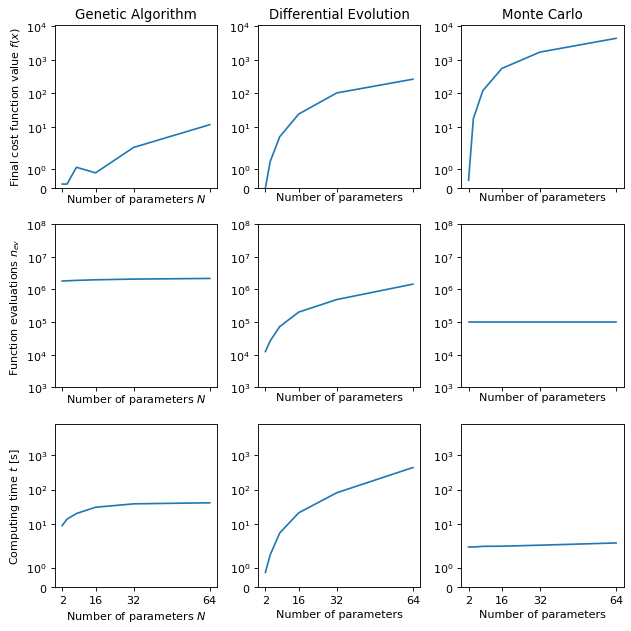

In [11]:
fig, axes = plt.subplots(3, 3, sharey=False, sharex=True, figsize=(8, 8), dpi=80)

ax = axes[0, 0]
ax.set_xticks([2, 16, 32, 64, 128])
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.set_ylabel('Final cost function value $f(x)$')
ax.set_title('Genetic Algorithm')
ax.plot(summary.loc['ga', 'f(x)'])

ax = axes[0, 1]
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.set_title('Differential Evolution')
ax.plot(summary.loc['differential_evolution', 'f(x)'])

ax = axes[0, 2]
ax.set_ylim((0, 11000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.set_title('Monte Carlo')
ax.plot(summary.loc['monte_carlo', 'f(x)'])

ax = axes[1, 0]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.set_ylabel('Function evaluations $n_{ev}$')
ax.plot(summary.loc['ga', 'nfev'])

ax = axes[1, 1]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.plot(summary.loc['differential_evolution', 'nfev'])

ax = axes[1, 2]
ax.set_ylim((1e3, 1e8))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.plot(summary.loc['monte_carlo', 'nfev'])

ax = axes[2, 0]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.set_ylabel('Computing time $t$ [s]')
ax.plot(summary.loc['ga', 'time'])

ax = axes[2, 1]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.plot(summary.loc['differential_evolution', 'time'])

ax = axes[2, 2]
ax.set_ylim((0, 8000))
ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters')
ax.plot(summary.loc['monte_carlo', 'time'])

plt.tight_layout()

# TODO: Run Monte Carlo with 10e7 iterations

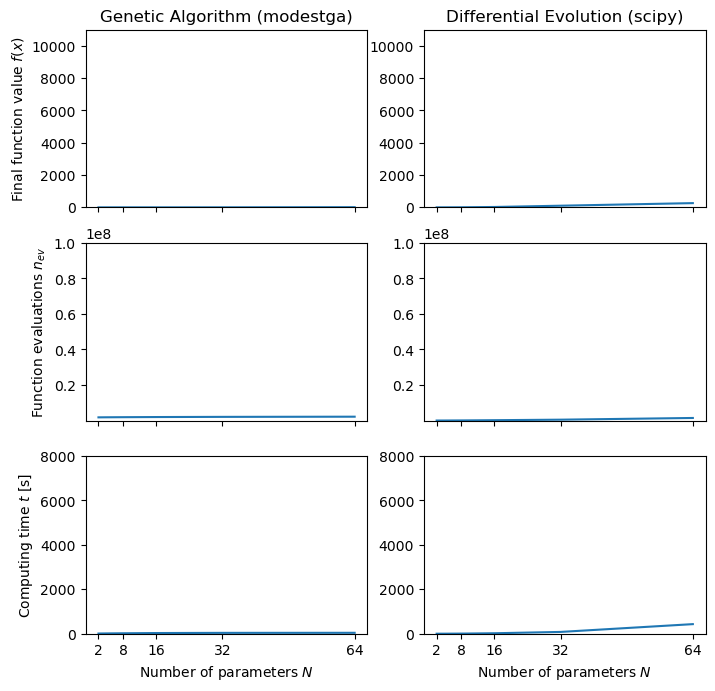

In [10]:
fig, axes = plt.subplots(3, 2, sharey=False, sharex=True, figsize=(8, 8), dpi=100)

ax = axes[0, 0]
ax.set_xticks([2, 8, 16, 32, 64, 128])
ax.set_ylim((0, 11000))
# ax.set_yscale('symlog')
ax.set_ylabel('Final function value $f(x)$')
ax.set_title('Genetic Algorithm (modestga)')
ax.plot(summary.loc['ga', 'f(x)'])

ax = axes[0, 1]
ax.set_ylim((0, 11000))
# ax.set_yscale('symlog')
ax.set_title('Differential Evolution (scipy)')
ax.plot(summary.loc['differential_evolution', 'f(x)'])

ax = axes[1, 0]
ax.set_ylim((1e3, 1e8))
# ax.set_yscale('symlog')
ax.set_ylabel('Function evaluations $n_{ev}$')
ax.plot(summary.loc['ga', 'nfev'])

ax = axes[1, 1]
ax.set_ylim((1e3, 1e8))
# ax.set_yscale('symlog')
ax.plot(summary.loc['differential_evolution', 'nfev'])

ax = axes[2, 0]
ax.set_ylim((0, 8000))
# ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.set_ylabel('Computing time $t$ [s]')
ax.plot(summary.loc['ga', 'time'])

ax = axes[2, 1]
ax.set_ylim((0, 8000))
# ax.set_yscale('symlog')
ax.set_xlabel('Number of parameters $N$')
ax.plot(summary.loc['differential_evolution', 'time'])

# TODO: Add std

In [7]:
df.groupby(['method', 'ndim']).std()

f(x)          nfev          ng        time
method                 ndim                                                  
differential_evolution 2       0.000000  2.032623e+03   10.163114    0.115493
                       4       1.576833  1.620650e+04   40.516252    1.013159
                       8       3.753103  2.366342e+04   29.579272    1.863825
                       16      6.660030  5.548205e+04   34.676281    5.697186
                       32     20.413491  1.400448e+05   43.764014   23.304202
                       64     36.176549  4.612270e+05   72.066713  143.517365
ga                     2       0.421424  1.185473e+06   54.222279    2.104173
                       4       0.421424  1.187276e+06   64.421873    2.459473
                       8       1.286032  1.189338e+06   65.029908    2.429893
                       16      0.918470  1.187272e+06  113.426628    4.251275
                       32      3.734517  1.187272e+06    0.000000    0.887848
                       64      4.237606  1.187272e+06    0.000000    0.431518
monte_carlo            2       0.430748  0.000000e+00    0.000000    0.120816
                       4       4.517352  0.000000e+00    0.000000    0.034236
                       8      20.357274  0.000000e+00    0.000000    0.109358
                       16     71.954624  0.000000e+00    0.000000    0.025912
                       32    118.842266  0.000000e+00    0.000000    0.131499
                       64    145.388582  0.000000e+00    0.000000    0.200405

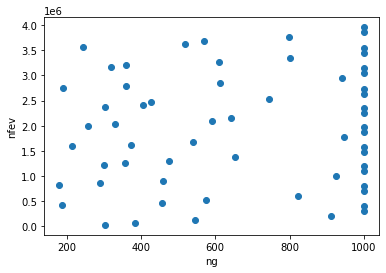

In [8]:
gadf = df.loc[df['method'] == 'ga']
plt.scatter(gadf['ng'], gadf['nfev'])
plt.xlabel('ng')
plt.ylabel('nfev')
plt.savefig('ng_vs_nfev.png')